<a href="https://colab.research.google.com/github/MadhushaMG/BCI-Motor-Imagery-AnalysisNew/blob/main/BCI_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!pip install mne

import mne

mne.datasets.eegbci.load_data(subject=1, runs=[3, 7, 11])


print("✅ Success! MNE installed and Data downloaded on Google Colab!")
print("Now we are REALLY ready to start.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 41.0 MB/s eta 0:00:00
Using default location ~/mne_data for EEGBCI...
Creating /root/mne_data


<ipython-input-1-2339262345>:10: FutureWarning: The ``subject`` parameter is deprecated and will be removed in version 1.9. Use the ``subjects`` parameter (note the `s`) to suppress this warning.
  mne.datasets.eegbci.load_data(subject=1, runs=[3, 7, 11])


Do you want to set the path:
    /root/mne_data
as the default EEGBCI dataset path in the mne-python config [y]/n? y
Attempting to create new mne-python configuration file:
/root/.mne/mne-python.json
Download complete in 42s (7.4 MB)
✅ Success! MNE installed and Data downloaded on Google Colab!
Now we are REALLY ready to start.


In [ ]:
import mne

# --- පියවර 1: දත්ත තියෙන තැන් ටික හොයාගැනීම (මේක කලින් වගේමයි) ---
subject_id = 1
motor_imagery_runs = [3, 7, 11]
file_paths = mne.datasets.eegbci.load_data(subject_id, runs=motor_imagery_runs)

# --- පියවර 2: හැම file එකක්ම එකින් එක කියවා list එකකට එකතු කරගැනීම ---
# මුලින්ම හිස් list එකක් (පාර්සල් එකක්) හදාගමු
list_of_raw_data = []

# දැන්, අර file_paths list එකේ තියෙන හැම path එකක් ගානෙම මේ දේ කරමු
for path in file_paths:
    # එක පාර එක path එකක් අරගෙන, ඒ file එක විතරක් කියවමු
    raw_file = mne.io.read_raw_edf(path, preload=True)
    # එහෙම කියවපු file එක, අර හිස් පාර්සල් එකට දාමු
    list_of_raw_data.append(raw_file)

# --- පියවර 3: දැන් අර පාර්සල් එකේ තියෙන දත්ත 3ම එකට අලවා එකක් බවට පත් කිරීම ---
# මේකට කියන්නේ concatenate කරනවා කියලා
raw = mne.concatenate_raws(list_of_raw_data)

# --- දැන්, අපි එකට එකතු කරපු ලොකු දත්ත එකේ විස්තරේ බලමු ---
print("✅ Successfully loaded and combined all files!")
print("Info of the combined raw data:")
print(raw.info)

Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from /root/mne_data/MNE-eegbci-data/files/eegmmidb/1.0.0/S001/S001R11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
✅ Successfully loaded and combined all files!
Info of the combined raw data:
<Info | 8 non-empty values
 bads: []
 ch_names: Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., C1.., ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 80.0 Hz
 meas_dat

Using matplotlib as 2D backend.


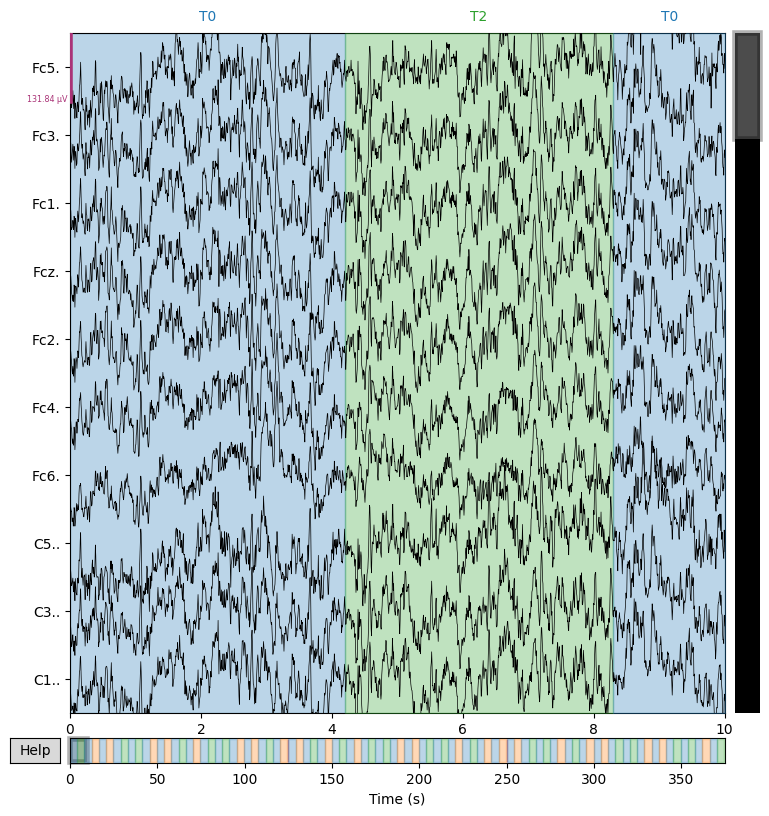

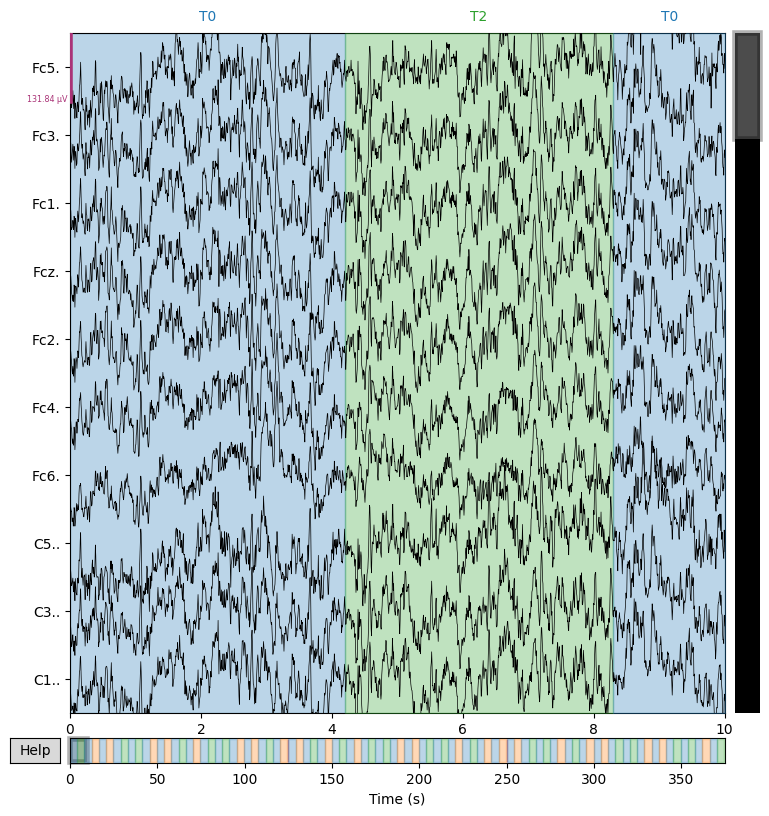

In [ ]:
# අපේ raw දත්ත ටික චිත්‍රයක් වගේ ඇඳලා බලමු!
# මේකෙන් interactive window එකක් open වේවි.
raw.plot(n_channels=10, duration=10, scalings='auto')

In [ ]:
import mne
import numpy as np # NumPy කියන්නේ arrays (දත්ත ශ්‍රේණි) එක්ක වැඩ කරන්න තියෙන වැදගත්ම tool එකක්

# 'raw' දත්ත එක ඇතුළේ තියෙන annotations වලින් events ටික වෙන් කරගැනීම
# මේකෙන් අපිට දේවල් දෙකක් ලැබෙනවා:
# 1. events - සිදුවීම් ටික තියෙන array එක
# 2. event_dict - එක එක සිදුවීමේ ID එකේ තේරුම තියෙන dictionary එක
events, event_dict = mne.events_from_annotations(raw)

# --- දැන් අපි බලමු අපිට හම්බවුණු දේවල් මොනවද කියලා ---

# හම්බවුණු events වලින් පළවෙනි 5 බලමු
print("The first 5 events found in the data are:")
print(events[:5])

# හම්බවුණු event ID වල තේරුම බලමු
print("\nDictionary of Event IDs:")
print(event_dict)


Used Annotations descriptions: [np.str_('T0'), np.str_('T1'), np.str_('T2')]
The first 5 events found in the data are:
[[   0    0    1]
 [ 672    0    3]
 [1328    0    1]
 [2000    0    2]
 [2656    0    1]]

Dictionary of Event IDs:
{np.str_('T0'): 1, np.str_('T1'): 2, np.str_('T2'): 3}


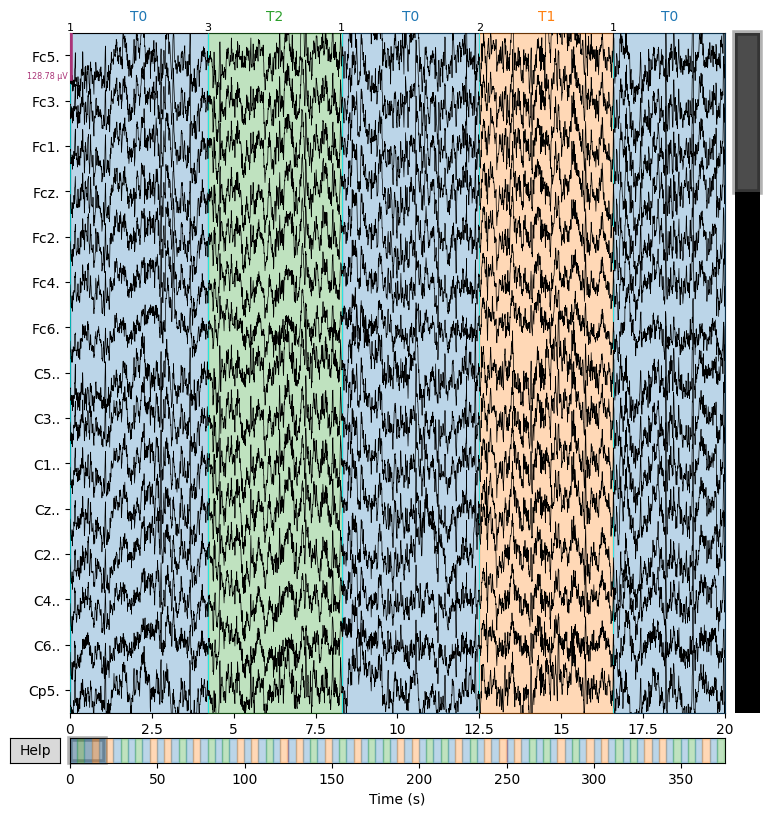

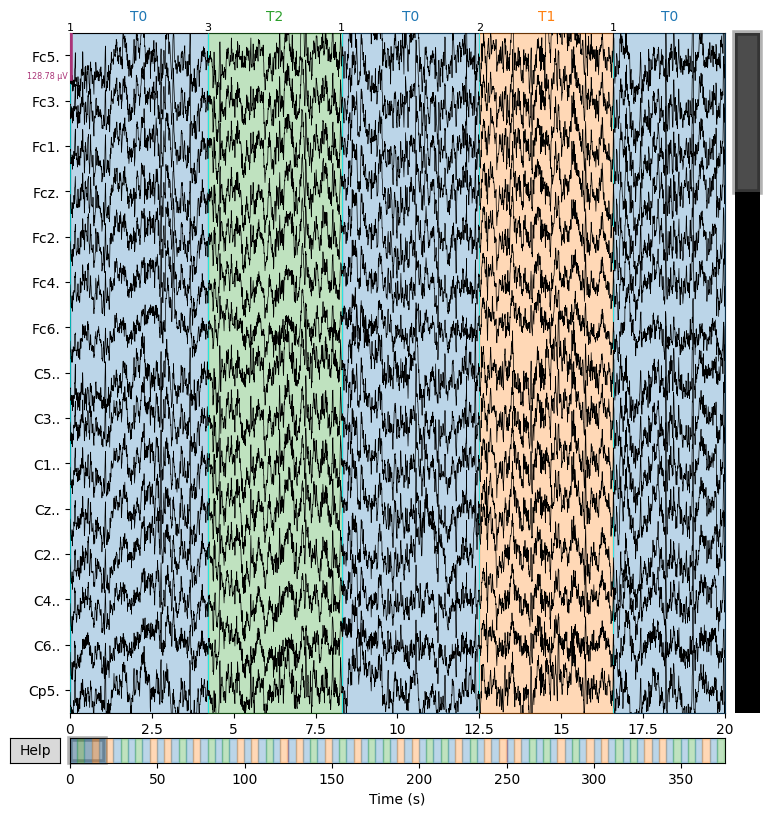

In [ ]:
# දැන් අපි කලින් කරා වගේම raw data එක plot කරමු
# හැබැයි මේ පාර අපි හොයාගත්තු events ටිකත් එක්ක
# එතකොට අර bookmarks ටික අපේ data පටිය උඩ පාට පාට ඉරි විදිහට පෙනේවි!
raw.plot(events=events, n_channels=15, duration=20, scalings='auto')

In [ ]:
import mne

# --- අපේ කතුරේ setting හදාගැනීම ---
# tmin: සිදුවීමට කොච්චර වෙලාවකට කලින්ද පටන් ගන්නේ
# tmax: සිදුවීමෙන් කොච්චර වෙලාවකට පස්සෙද ඉවර කරන්නේ
tmin = -1.0  # තත්පර 1ක් කලින් පටන් ගන්න
tmax = 4.0   # තත්පර 4කට පස්සේ ඉවර කරන්න

# අපිට ඕන 'වම් අත' සහ 'දකුණු අත' කියන සිදුවීම් වලට අදාළව විතරයි කපන්න.
# 'T0' (Rest) කියන එක අපිට දැන් අවශ්‍ය නෑ.
# ඒ නිසා අපි අලුතෙන්, අපිට ඕන event ටික විතරක් තියෙන dictionary එකක් හදාගන්නවා.
event_ids_we_want = {'left_hand': 2, 'right_hand': 3} # ඔයාගේ event_dict එකේ T1,T2 වලට අදාළ අංක මෙතන දෙන්න

# --- දැන්, "කතුර" පාවිච්චි කරලා දත්ත කපමු ---
# මේක තමයි Epoching කරන ප්‍රධාන command එක
epochs = mne.Epochs(raw,
                    events=events,
                    event_id=event_ids_we_want,
                    tmin=tmin,
                    tmax=tmax,
                    baseline=None, # මේක ගැන පස්සේ කතා කරමු
                    preload=True) # කපපු කෑලි ටික memory එකට දාගන්න

# --- අපි හදාගත්තු දත්ත කැබලි (epochs) එකතුව ගැන විස්තර බලමු ---
print("✅ Epochs have been created successfully!")
print(epochs)

Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 45 events and 801 original time points ...
0 bad epochs dropped
✅ Epochs have been created successfully!
<Epochs | 45 events (all good), -1 – 4 s (baseline off), ~17.7 MiB, data loaded,
 'left_hand': 23
 'right_hand': 22>


In [ ]:
# අපි කපාගත්තු epoch 45ම එකම චිත්‍රයකින් බලමු
# මේක හරියට අපේ photo album එකේ photos ඔක්කොම එකපාර බිත්තියක අලවලා බලනවා වගේ
# අපි මෙතනදී channels 64න්, අතේ චලනයට අදාළම වෙන ප්‍රධාන channels 3ක් විතරක් තෝරලා බලමු
epochs.plot_image(picks=['C3', 'C4', 'Cz'])

ValueError: picks (['C3', 'C4', 'Cz']) could not be interpreted as channel names (no channel "[np.str_('C3'), np.str_('C4'), np.str_('Cz')]"), channel types (no type "C3" present), or a generic type (just "all" or "data")

Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
45 matching events found
No baseline correction applied
0 projection items activated


<ipython-input-9-2108029756>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks=['C3..', 'C4..', 'Cz..'])
<ipython-input-9-2108029756>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks=['C3..', 'C4..', 'Cz..'])
<ipython-input-9-2108029756>:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  epochs.plot_image(picks=['C3..', 'C4..', 'Cz..'])


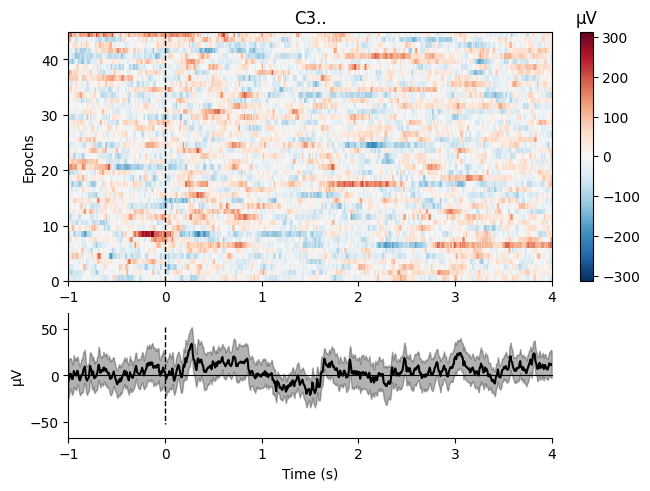

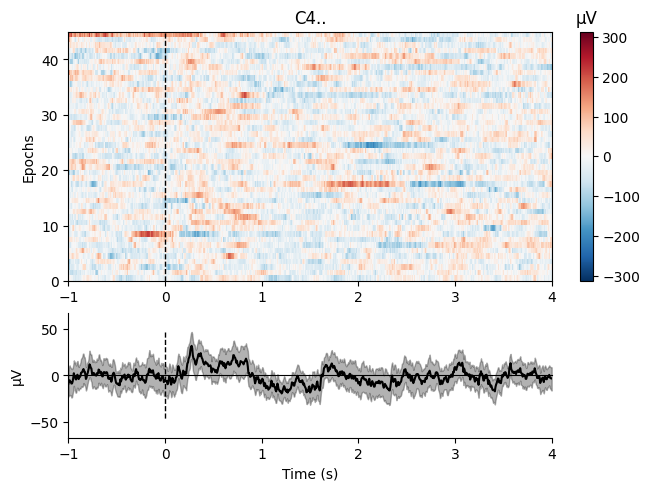

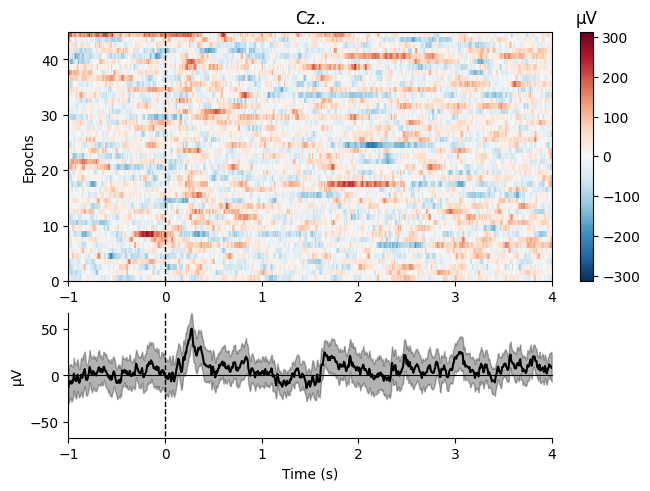

[<Figure size 640x480 with 3 Axes>,
 <Figure size 640x480 with 3 Axes>,
 <Figure size 640x480 with 3 Axes>]

In [ ]:
# අපි දත්ත වල තියෙන නියම channel නම් පාවිච්චි කරමු (අගට තිත් දෙකක් සමඟ)
epochs.plot_image(picks=['C3..', 'C4..', 'Cz..'])

In [ ]:
import numpy as np
# අපි අර කලින් error ආපු line එක අයින් කරලා තියෙන්නේ
# from mne.time_frequency import psd_welch <--- මේක දැන් ඕන නෑ

# --- අපිට උනන්දුවක් දක්වන frequency bands ටික ---
FREQ_BANDS = {"alpha": [8.0, 12.0],
              "beta": [13.0, 30.0]}

# --- Power එක ගණනය කිරීමේ නිවැරදි ක්‍රමය ---
# අපි කෙලින්ම 'epochs' object එකෙන්ම අහනවා power එක ගණනය කරන්න කියලා
psd = epochs.compute_psd(method='welch',
                         picks=['C3..', 'C4..', 'Cz..'],
                         fmin=8.0,
                         fmax=30.0,
                         verbose=False) # මේකෙන් අනවශ්‍ය text එන එක නවතිනවා

# --- දැන්, හැම epoch එකකින්ම, හැම band එකකටම අදාළව features හදාගමු ---
# මේ කොටස කලින් එකට වඩා ටිකක් වෙනස්, මොකද උඩින් එන psd එකේ structure එක වෙනස්
freqs = psd.freqs
X_features = []
for fmin, fmax in FREQ_BANDS.values():
    # අදාළ band එකේ power ටික average කරලා X_features list එකට දානවා
    band_power = psd.get_data(fmin=fmin, fmax=fmax).mean(axis=2)
    X_features.append(band_power)

# --- දත්ත, Machine Learning model එකට දෙන්න පුළුවන් විදිහට සකස් කරමු (මේ කොටස කලින් වගේමයි) ---
X = np.concatenate(X_features, axis=1)
y = epochs.events[:, -1]

print("✅ Feature Extraction Complete! (This time for real!)")
print("Shape of our features matrix (X):", X.shape)
print("Shape of our labels vector (y):", y.shape)
print("\nExample of features for the first trial (epoch):")
print(X[0])
print("\nLabel for the first trial (epoch):", y[0])

✅ Feature Extraction Complete! (This time for real!)
Shape of our features matrix (X): (45, 6)
Shape of our labels vector (y): (45,)

Example of features for the first trial (epoch):
[1.76396237e-11 1.28653831e-11 1.43978376e-11 1.13329051e-11
 6.17038574e-12 9.61389852e-12]

Label for the first trial (epoch): 3


🧠 Now training the AI model...
✅ Training complete!

--- 🤖 BCI Model Performance ---
Accuracy: 33.33%

මේකේ තේරුම, අපේ model එකට අලුතෙන් දුන්නු trials වලින් 33.33% ක් 'වම' ද 'දකුණ' ද කියා නිවැරදිව හඳුනාගන්න පුළුවන් වෙලා තියෙනවා!


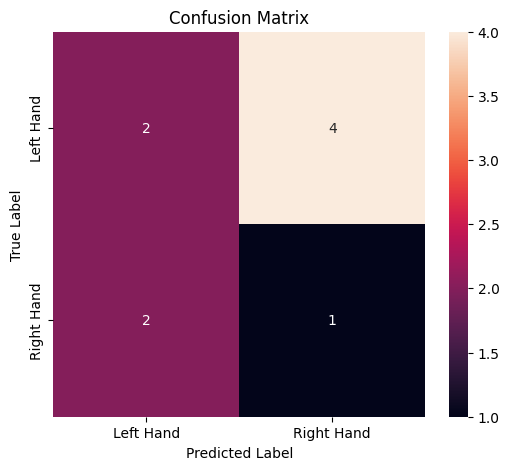

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# --- පියවර 1: දත්ත, පුහුණු කරන සහ පරීක්ෂා කරන කොටස් වලට වෙන් කිරීම ---
# අපි 80% ක් පුහුණු කිරීමටත්, 20% ක් පරීක්ෂා කිරීමටත් වෙන් කරමු.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- පියවර 2: AI Model එක හදාගෙන පුහුණු කිරීම ---
# අපි පාවිච්චි කරන්නේ Linear Discriminant Analysis (LDA) කියන සරල ඒත් බලවත් model එකක්
model = LinearDiscriminantAnalysis()

# "Fit" කියන්නේ පුහුණු කරනවා කියන එක. අපි model එකට training දත්ත සහ පිළිතුරු දෙනවා.
print("🧠 Now training the AI model...")
model.fit(X_train, y_train)
print("✅ Training complete!")

# --- පියවර 3: Model එක පරීක්ෂා කිරීම ---
# Model එකට කවදාවත් දැකලා නැති test දත්ත (X_test) දීලා, පිළිතුරු අනුමාන කරන්න කියමු
y_pred = model.predict(X_test)

# Model එකේ අනුමාන කිරීම් (y_pred), සැබෑ පිළිතුරු (y_test) එක්ක සසඳා බලමු
accuracy = accuracy_score(y_test, y_pred)

# --- පියවර 4: ප්‍රතිඵලය බලමු! ---
print("\n--- 🤖 BCI Model Performance ---")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"\nමේකේ තේරුම, අපේ model එකට අලුතෙන් දුන්නු trials වලින් {accuracy*100:.2f}% ක් 'වම' ද 'දකුණ' ද කියා නිවැරදිව හඳුනාගන්න පුළුවන් වෙලා තියෙනවා!")

# --- ප්‍රතිඵලය තවත් පැහැදිලි කරගන්න confusion matrix එකක් බලමු ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Left Hand', 'Right Hand'], yticklabels=['Left Hand', 'Right Hand'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()